### Text Mining: High-Frequency Words

Homework Team 4 - John Grando, Nick Capofari, Ken Markus, Armenoush Aslanian-Persico, Andrew Goldberg

MSDA Data 620, Week 4 Part 2

## Introduction

Our assignment:

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

About the corpus:

The Reuters corpus contains over 10,000 news articles from 1987. The articles are in 90 different categories. The corpus contains 1.3 million words. The corpus is available from the NLTK package.

## Setup

In [1]:
import pandas as pd 
import nltk, re, pprint
import matplotlib.pyplot as plt 
import numpy as np
from nltk import word_tokenize
from nltk.corpus import reuters
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from IPython.display import display
from scipy import stats

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
rcorp=nltk.download('reuters')

[nltk_data] Downloading package punkt to C:\Users\Aslanian-
[nltk_data]     PersicoA.FINANCE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aslanian-
[nltk_data]     PersicoA.FINANCE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to C:\Users\Aslanian-
[nltk_data]     PersicoA.FINANCE\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


## Summary Statistics

In [3]:
rcategories = reuters.categories()

In [4]:
total = len(reuters.paras())
runtotal = 0
print(("%-15s || %s") % ("Category", "Number of documents out of %d total") % (total))
for c in rcategories:
    doccount = len(reuters.paras(categories=[c]))
    runtotal += doccount
    #print(("%-15s || %d") % (c, doccount))

print("Average categories per article: %.2f" % ((runtotal * 1.0) / total))
print("Average articles per category: %.2f" % ((total * 1.0) / len(rcategories)))

Category        || Number of documents out of 11887 total
Average categories per article: 1.23
Average articles per category: 132.08


## Total Unique Words

In [5]:
#Using FreqDist function
freqwords = FreqDist(reuters.words())
len(freqwords)

41600

## The 200 Highest Frequency Words

In [6]:
# Remove non-alpha characters
r1=nltk.corpus.reuters.words()
r1unique = set(r1)
r1 = [w for w in r1 if w.isalpha()]

In [7]:
# Remove 'stop words'
r1 = [w for w in r1 if w not in stopwords.words('english')]

In [8]:
# Collect highest frequency words
freqr1 = nltk.FreqDist(r1)

# Show highest frequency words
pd.set_option('display.max_rows', len(freqr1.most_common(200)))
print (display(pd.DataFrame(freqr1.most_common(200), columns = ['word','frequency'])))

,word,frequency
0,said,25224
1,mln,18037
2,vs,14120
3,dlrs,11730
4,The,10968
5,pct,9093
6,lt,8694
7,cts,7953
8,U,6388
9,S,6382


None


## The 200 Highest Frequency Words Plotted by Count

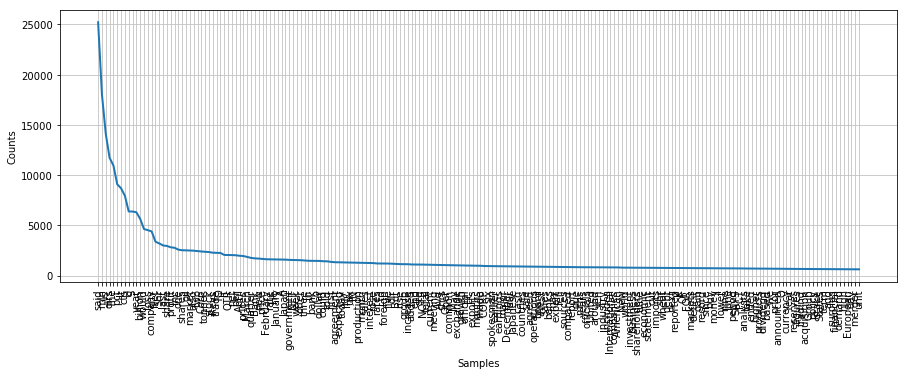

In [9]:
plt.figure(figsize=(15,5))
freqr1.plot(200)

## The 20 Highest Frequency Words by Count and Percentage Appearance

In [10]:
# Show word counts and relative frequencies
r1mostfreq = pd.DataFrame(freqr1.most_common(200),columns=['word','count']) ## uncomment to run pandas
r1mostfreq['PctAppearing'] = r1mostfreq['count']/float(len(r1)) ## uncomment to run pandas
r1mostfreq.head(20) ## uncomment to run pandas

,word,count,PctAppearing
0,said,25224,0.027565
1,mln,18037,0.019711
2,vs,14120,0.015430
3,dlrs,11730,0.012819
4,The,10968,0.011986
5,pct,9093,0.009937
6,lt,8694,0.009501
7,cts,7953,0.008691
8,U,6388,0.006981
9,S,6382,0.006974


## The 20 Highest Frequency Words Plotted by Cumulative Count

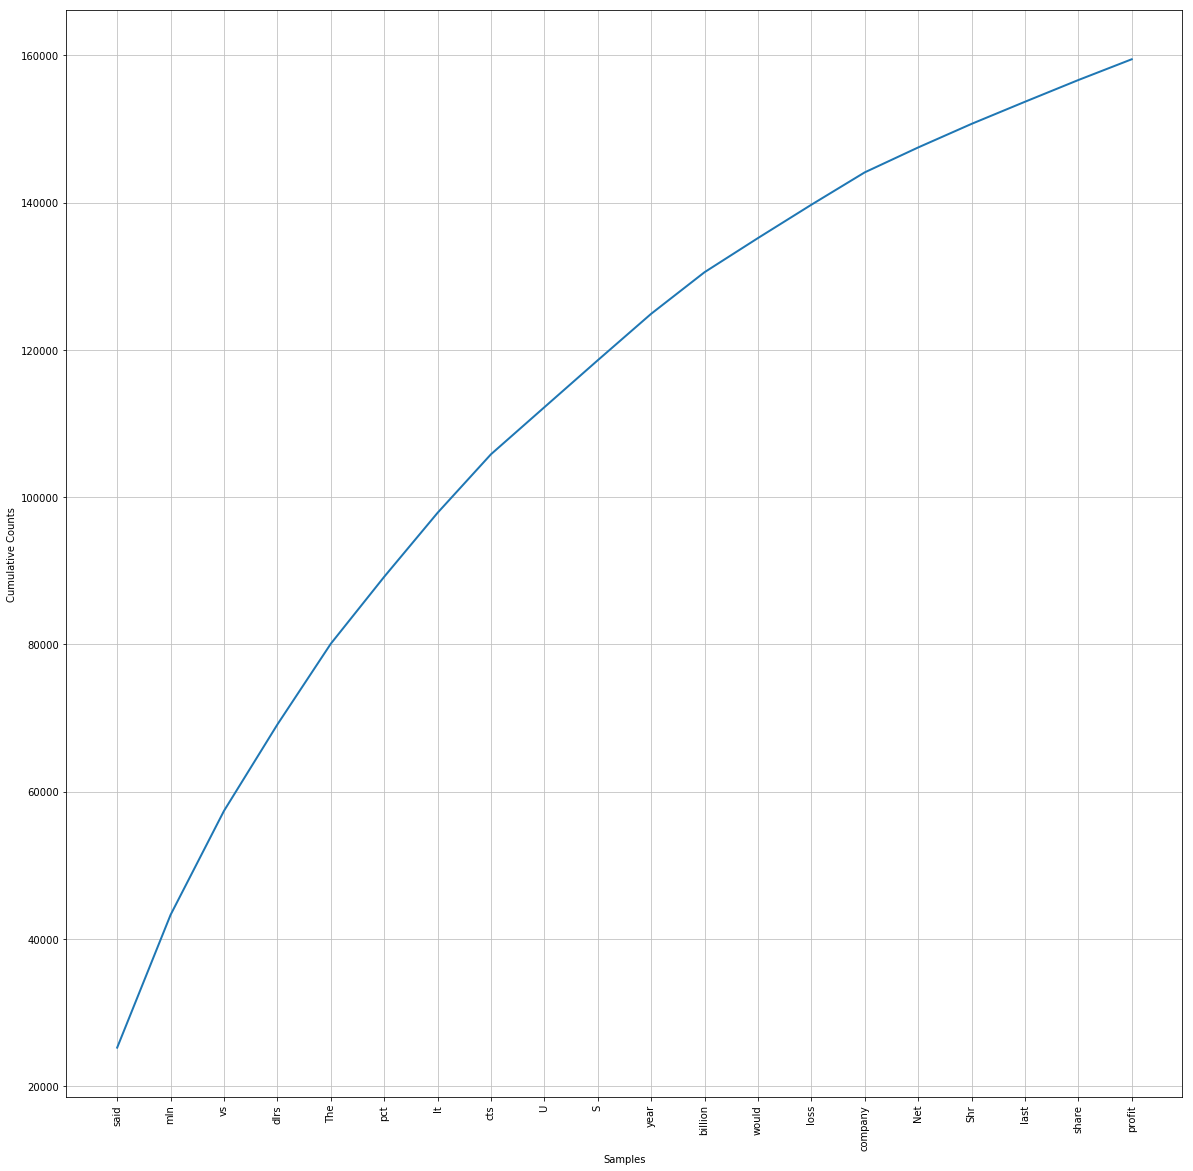

In [11]:
fig, ax = plt.subplots(figsize=(20,20)) 
ax = freqr1.plot(20, cumulative=True) 

The 20 most common words make up over 350,000 of the 1.3 million words in the corpus.

## The Most Common Trigrams

In [12]:
#Show most common trigrams
#preceding and following words
#pick a word

w = "mln"
pwd = {}
fwd = {}
for pw, fw in [(a, c) for (a, b, c) in nltk.trigrams(r1) if b == w]:
    if pw in pwd:
        pwd[pw] += 1
    else:
        pwd[pw] = 1
    if fw in fwd:
        fwd[fw] += 1
    else:
        fwd[fw] = 1
pwdf = pd.DataFrame.from_dict(pwd, orient='index')
pwdf.columns = ["count"]
fwdf = pd.DataFrame.from_dict(fwd, orient='index')
fwdf.columns = ["count"]
print ("Most common preceding words to %s" % (w))
print (display(pwdf.sort_values("count", ascending=False)[:10]))
print ("Most common following words to %s" % (w))
print (display(fwdf.sort_values("count", ascending=False)[:10]))

most_trigram = pd.DataFrame(nltk.FreqDist([(a, b, c) for (a, b, c) in nltk.trigrams(r1) if b == w])\
                          .most_common(20), columns=["trigram","count"])
print ("Most common trigrams with %s as the middle word" % (w))
print (display(most_trigram))

#Sample a piece of the text
#print r1[:100]

Most common preceding words to mln


,count
vs,3928
Revs,1532
Net,533
loss,519
Sales,516
shrs,391
profit,372
dlrs,294
pct,240
mln,213


None
Most common following words to mln


,count
dlrs,4197
vs,3917
stg,794
tonnes,789
Avg,639
NOTE,596
Revs,482
dlr,386
Year,293
shares,288


None
Most common trigrams with mln as the middle word


,trigram,count
0,"(Revs, mln, vs)",1499
1,"(vs, mln, Avg)",630
2,"(vs, mln, NOTE)",573
3,"(Sales, mln, vs)",514
4,"(Net, mln, vs)",513
5,"(shrs, mln, vs)",385
6,"(vs, mln, Revs)",323
7,"(vs, mln, Year)",282
8,"(vs, mln, Nine)",272
9,"(loss, mln, vs)",171


None


## Zipf's Law

Zipf's law states that the frequency of a word type is inversely proportional to its rank.

In [13]:
r1zipf = pd.DataFrame(freqr1.most_common(1000), columns=['word','count'])
r1zipf["rank"] = r1zipf.index + 1

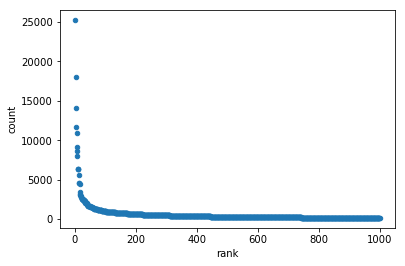

In [14]:
%matplotlib inline
r1zipf.plot(kind='scatter', x="rank", y="count")

Yes, the distribution follows Zipf's law because the graph is showing that count is inversely proportional to rank.

Perform log transformations to see if a linear regression can be performed.

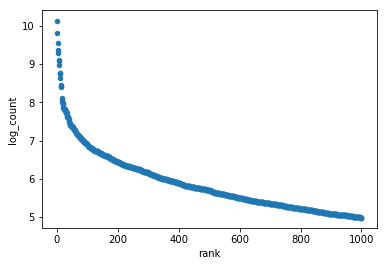

In [15]:
r1zipf["log_count"] = np.log(r1zipf["count"])
r1zipf.plot(kind='scatter', x="rank", y="log_count")

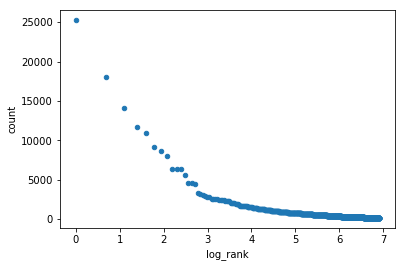

In [16]:
r1zipf["log_rank"] = np.log(r1zipf["rank"])
r1zipf.plot(kind='scatter', x="log_rank", y="count")

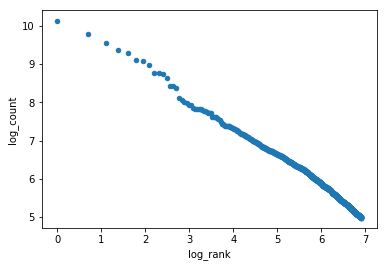

In [17]:
r1zipf.plot(kind='scatter', x="log_rank", y="log_count")

In [18]:
y_val = r1zipf["log_count"]
x_val = r1zipf["log_rank"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_val,y_val)
print (slope, intercept, r_value, p_value, std_err)

-0.791610971983 10.5623151065 -0.995782544672 0.0 0.00230868074473


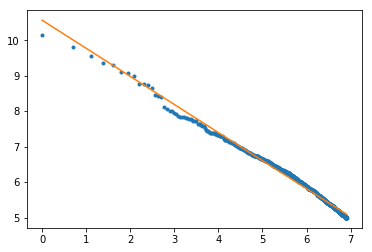

In [19]:
plt.plot(x_val, y_val, ".")
plt.plot(x_val, slope * x_val + intercept, "-")

In [20]:
#Preview table
#print display(r1zipf.head(20))
print ("The best fit linear regression curve is ln(y) = %2.2f * ln(x) + %2.2f." % (slope, intercept)  )

The best fit linear regression curve is ln(y) = -0.79 * ln(x) + 10.56.


## Conclusion

The Reuters corpus differs from "all words in all corpora." This is evident from the list of most frequent words and trigrams. This corpus contains financial terms and abbreviations such as "mln" for million, "shrs" for shares, and "dlrs" for dollars.